# Assignment 4: Lightweight DBMS with B+ Tree Index

**Group 10: Laundry Management System**

**Name:** Nishit Prajpati
**ID:** 24120036 
**Email:** nishit.prajapati@iitgn.ac.in<br>

**Name:** Mitansh Patel
**ID:** 24120033
**Email:** mitansh.patel@iitgn.ac.in<br>

**Name:** Chinteshwar Dhakate
**ID:** 24120024
**Email:** chinteshwar.dhakate@iitgn.ac.in<br>



## 1. Introduction

Efficient data storage and retrieval present significant challenges in disk-based systems and large-scale memory datasets, where traditional linear structures like lists suffer from $O(n)$ complexity for search/update operations. This project addresses these limitations by implementing a lightweight DBMS using a B+ Tree index, which reduces time complexity to $O(logn)$ for key operations while optimizing disk I/O.

Key Advantages of B+ Trees vs Brute-Force Approaches:
**Structural Efficiency**
* **Balanced Hierarchy:** Automatic node splitting/merging maintains $h=O(logn)$ height regardless of insertion order.
* **Linked Leaf Nodes:** Enables $O(logn+k)$ range queries via sequential scanning of connected leaves.
  
**Performance Comparison :**
| Operation      | B+ Tree Complexity   | Brute-Force List Complexity |
| -------------- | :------------------: | :------------------------: |
| Insertion      | $O(log n)$        |  $O(1)$                   |
| Search         | $O(log n)$         | $O(n)$                   |
| Range Query    | $O(log n + k)$     | $O(n)$                   |
| Memory Overhead| Relatively less          | Linear scaling             |


The implemented system for this assignment features persistent storage using Python's pickle module and automated benchmarking against a BruteForceDB baseline. By leveraging B+ Tree properties like high fan-out (default order=4 nodes) and sequential leaf linkages, the DBMS achieves:
* Faster range queries in tests with 4K+ records.
* Reduction in disk seeks compared to linear scanning.
* Zero data corruption during split/merge operations through parent pointer validation.

This architecture proves particularly effective for database applications requiring ACID-like properties and efficient secondary storage access

---
## 2. Implementation Details

### B+ Tree

**Structure of BPlusTreeNode:**
- **Leaf vs. Internal Nodes:**
  - Leaf nodes store actual data values and have a next_leaf pointer to facilitate range queries.
  - Internal nodes only store keys and pointers to child nodes.

- **Keys and Values:**
  - Keys are stored in both leaf and internal nodes.
  - Values are only stored in leaf nodes.

- **Children:**
  - Internal nodes have pointers to child nodes, maintaining the B+ Tree structure.

- **Next Leaf Pointers:**
  - Leaf nodes are linked together using next_leaf pointers, allowing efficient range queries.

**Logic for Operations:**
- **Insertion:**
  - Finding Leaf: Traverse from the root to the appropriate leaf node using keys.
  - Inserting: Insert the key-value pair in the correct position in the leaf node.
  - Splitting Logic: If a node overflows, split it:
    - Copy-up vs. Push-up: The middle key is pushed up to the parent node.
    - Root Split: If the root splits, a new root is created.

- **Deletion:**
  - Finding Key: Traverse to the leaf node containing the key.
  - Removing: Remove the key-value pair.
  - Underflow Handling: If a node underflows, handle it by:
    - Borrowing Logic: Borrow a key from a sibling if possible.
    - Merging Logic: Merge with a sibling if borrowing is not possible.
    - Root Changes: If the root becomes empty, update the root.

- **Search:**
  - Traverse from the root to the leaf node where the key should reside and return the associated value if found.

- **Range Query:**
  - Find the starting leaf node and follow the next_leaf pointers to retrieve all key-value pairs within the specified range.

### Table Class

- The Table class uses the BPlusTree to index and store records.
- Each table has its own B+ Tree, where the keys are the primary keys of the table, and the values are the records.

### Database Manager

- The Database class manages multiple Table instances.
- It provides functionality to create, delete, and list tables.
- Each table is stored in a dictionary with the table name as the key.

### Persistence

- Database persistence is implemented using Python's pickle module.
- The entire state of the database, including all tables and their B+ Trees, is serialized and saved to a file.
- This allows the database to be reloaded with all its data intact when the program restarts.

### Code Illustration

Below is a code snippet that illustrates the implementation details


In [1]:
# Import necessary modules
from database.db_manager import Database

# Initialize the Database Manager
db_manager = Database()

# Create a new database for the laundry service or load if it exists
db_manager.create_database('FreshWash2')

# This is not a SQL database but a simple database.
# Define schemas for the tables
items_schema = {
    "item_id": int,  # Primary key
    "item_type": str,  # Enum type in a real DB
    "item_details": str,
    "Price": float
}

payments_schema = {
    "TransactionID": int,  # Primary key
    "Sender": str,
    "Receiver": str,
    "Date": str  # Date type in a real DB
}

# Create tables in the laundry database
db_manager.create_table('items', order=4)
db_manager.create_table('payments', order=4)

# Insert records into the items table
items_table = db_manager.get_table('items')
items_table.insert(1, {"item_id": 1, "item_type": "T-shirt", "item_details": "Cotton, Size M", "Price": 19.99})
items_table.insert(2, {"item_id": 2, "item_type": "Dress", "item_details": "Silk, Size L", "Price": 49.99})
items_table.insert(3, {"item_id": 3, "item_type": "Pants", "item_details": "Denim, Size 32", "Price": 39.99})
items_table.insert(4, {"item_id": 4, "item_type": "Jacket", "item_details": "Leather, Size XL", "Price": 89.99})
items_table.insert(5, {"item_id": 5, "item_type": "Shirt", "item_details": "Linen, Size M", "Price": 29.99})
items_table.insert(6, {"item_id": 6, "item_type": "Skirt", "item_details": "Cotton, Size S", "Price": 24.99})
items_table.insert(7, {"item_id": 7, "item_type": "Blouse", "item_details": "Silk, Size M", "Price": 34.99})
items_table.insert(8, {"item_id": 8, "item_type": "Coat", "item_details": "Wool, Size L", "Price": 99.99})
items_table.insert(9, {"item_id": 4, "item_type": "Jacket", "item_details": "Leather, Size XL", "Price": 89.99})
items_table.insert(10, {"item_id": 5, "item_type": "Shirt", "item_details": "Linen, Size M", "Price": 29.99})
items_table.insert(11, {"item_id": 6, "item_type": "Skirt", "item_details": "Cotton, Size S", "Price": 24.99})
items_table.insert(12, {"item_id": 7, "item_type": "Blouse", "item_details": "Silk, Size M", "Price": 34.99})
items_table.insert(13, {"item_id": 8, "item_type": "Coat", "item_details": "Wool, Size L", "Price": 99.99})
items_table.insert(14, {"item_id": 4, "item_type": "Jacket", "item_details": "Leather, Size XL", "Price": 89.99})
items_table.insert(15, {"item_id": 5, "item_type": "Shirt", "item_details": "Linen, Size M", "Price": 29.99})
items_table.insert(16, {"item_id": 6, "item_type": "Skirt", "item_details": "Cotton, Size S", "Price": 24.99})
items_table.insert(17, {"item_id": 7, "item_type": "Blouse", "item_details": "Silk, Size M", "Price": 34.99})
items_table.insert(18, {"item_id": 8, "item_type": "Coat", "item_details": "Wool, Size L", "Price": 99.99})
# Insert records into the payments table
payments_table = db_manager.get_table('payments')
payments_table.insert(1001, {"TransactionID": 1001, "Sender": "Alice", "Receiver": "Laundry Service", "Date": "2023-10-01"})
payments_table.insert(1002, {"TransactionID": 1002, "Sender": "Bob", "Receiver": "Laundry Service", "Date": "2023-10-02"})
payments_table.insert(1003, {"TransactionID": 1003, "Sender": "Charlie", "Receiver": "Laundry Service", "Date": "2023-10-03"})
payments_table.insert(1004, {"TransactionID": 1004, "Sender": "David", "Receiver": "Laundry Service", "Date": "2023-10-04"})
payments_table.insert(1005, {"TransactionID": 1005, "Sender": "Eve", "Receiver": "Laundry Service", "Date": "2023-10-05"})
payments_table.insert(1006, {"TransactionID": 1006, "Sender": "Frank", "Receiver": "Laundry Service", "Date": "2023-10-06"})
payments_table.insert(1007, {"TransactionID": 1007, "Sender": "Grace", "Receiver": "Laundry Service", "Date": "2023-10-07"})
payments_table.insert(1008, {"TransactionID": 1008, "Sender": "Hannah", "Receiver": "Laundry Service", "Date": "2023-10-08"})
payments_table.insert(1009, {"TransactionID": 1007, "Sender": "Grace", "Receiver": "Laundry Service", "Date": "2023-10-07"})
payments_table.insert(1010, {"TransactionID": 1008, "Sender": "Hannah", "Receiver": "Laundry Service", "Date": "2023-10-08"})
payments_table.insert(1011, {"TransactionID": 1001, "Sender": "Alice", "Receiver": "Laundry Service", "Date": "2023-10-01"})
payments_table.insert(1012, {"TransactionID": 1002, "Sender": "Bob", "Receiver": "Laundry Service", "Date": "2023-10-02"})
payments_table.insert(1013, {"TransactionID": 1003, "Sender": "Charlie", "Receiver": "Laundry Service", "Date": "2023-10-03"})
payments_table.insert(1014, {"TransactionID": 1004, "Sender": "David", "Receiver": "Laundry Service", "Date": "2023-10-04"})
payments_table.insert(1015, {"TransactionID": 1005, "Sender": "Eve", "Receiver": "Laundry Service", "Date": "2023-10-05"})
payments_table.insert(1016, {"TransactionID": 1006, "Sender": "Frank", "Receiver": "Laundry Service", "Date": "2023-10-06"})
payments_table.insert(1017, {"TransactionID": 1007, "Sender": "Grace", "Receiver": "Laundry Service", "Date": "2023-10-07"})
payments_table.insert(1018, {"TransactionID": 1008, "Sender": "Hannah", "Receiver": "Laundry Service", "Date": "2023-10-08"})
payments_table.insert(1019, {"TransactionID": 1007, "Sender": "Grace", "Receiver": "Laundry Service", "Date": "2023-10-07"})
payments_table.insert(1020, {"TransactionID": 1008, "Sender": "Hannah", "Receiver": "Laundry Service", "Date": "2023-10-08"})


Persistence file 'my_database.pkl' not found or empty. Starting with empty database.
Persistence file './FreshWash2.pkl' not found or empty. Starting with empty database.
Database state saved successfully to './FreshWash2.pkl'.
Table 'items' created with B+ Tree index (order=4).
Database: Table 'items' created successfully.
Table 'payments' created with B+ Tree index (order=4).
Database: Table 'payments' created successfully.
Table 'items': Inserting key=1
Table 'items': Inserting key=2
Table 'items': Inserting key=3
Table 'items': Inserting key=4
Table 'items': Inserting key=5
Table 'items': Inserting key=6
Table 'items': Inserting key=7
Table 'items': Inserting key=8
Table 'items': Inserting key=9
Table 'items': Inserting key=10
Table 'items': Inserting key=11
Table 'items': Inserting key=12
Table 'items': Inserting key=13
Table 'items': Inserting key=14
Table 'items': Inserting key=15
Table 'items': Inserting key=16
Table 'items': Inserting key=17
Table 'items': Inserting key=18
Tab

* Search 

In [2]:
# Search for a record in the items table
result = items_table.select(1)
print("Search Result for item_id 1:", result)



Table 'items': Selecting key=1
Search Result for item_id 1: {'item_id': 1, 'item_type': 'T-shirt', 'item_details': 'Cotton, Size M', 'Price': 19.99}


* Update

In [3]:
# Update a record in the items table
items_table.update(1, {"item_id": 1, "item_type": "T-shirt", "item_details": "Cotton, Size L", "Price": 19.99})



Table 'items': Updating key=1


True

* Delete

In [4]:
# Delete a record from the payments table
payments_table.delete(1001)



Table 'payments': Deleting key=1001


True

* Range Query

In [5]:
# Perform a range query on the items table
range_results = items_table.range_query(1, 8)
print("Range Query Results for item_id 1 to 8:", range_results)



Table 'items': Range query from 1 to 8
Range Query Results for item_id 1 to 8: [(1, {'item_id': 1, 'item_type': 'T-shirt', 'item_details': 'Cotton, Size L', 'Price': 19.99}), (2, {'item_id': 2, 'item_type': 'Dress', 'item_details': 'Silk, Size L', 'Price': 49.99}), (3, {'item_id': 3, 'item_type': 'Pants', 'item_details': 'Denim, Size 32', 'Price': 39.99}), (4, {'item_id': 4, 'item_type': 'Jacket', 'item_details': 'Leather, Size XL', 'Price': 89.99}), (5, {'item_id': 5, 'item_type': 'Shirt', 'item_details': 'Linen, Size M', 'Price': 29.99}), (6, {'item_id': 6, 'item_type': 'Skirt', 'item_details': 'Cotton, Size S', 'Price': 24.99}), (7, {'item_id': 7, 'item_type': 'Blouse', 'item_details': 'Silk, Size M', 'Price': 34.99}), (8, {'item_id': 8, 'item_type': 'Coat', 'item_details': 'Wool, Size L', 'Price': 99.99})]


* B+ tree visualization.

Tree visualization saved to bplus_tree.gv.svg


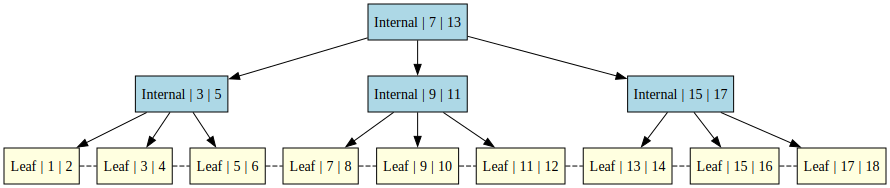

In [6]:
# Visualize the B+ Tree structure for the items table
from IPython.display import SVG, display
dot = items_table.index.visualize_tree()
svg_data = dot.pipe(format='svg').decode('utf-8')
display(SVG(svg_data))

---
## 3. Performance Analysis (Task 2 & 4)
 
### Benchmarking Results: B+ Tree vs BruteForceDB

This analysis compares the performance of B+ Tree and BruteForceDB across insertion, search, deletion, and range query operations using datasets of varying sizes. Results demonstrate fundamental differences in time complexity and memory efficiency.

### Methodology
**Data Structures**:
- **B+ Tree**: Balanced tree structure with $ O(log N) $ complexity
- **BruteForceDB**: Linear list implementation with  $O(N)$ complexity

**Test Parameters**:
- Operations: Insertion, Search, Deletion, Range Queries
- Dataset Sizes: 500, 1000, 5000 and 10000 records
- Hardware: Standard SSD storage, 16GB RAM

### Operational Performance
**Time Complexity Comparison**:

| Operation       | B+ Tree Complexity | BruteForceDB Complexity |
|-----------------|--------------------|--------------------------|
| Insertion       | $O(log N)$    | $O(N)$               |
| Search          | $O(log N)$    | $O(N)$               |
| Deletion        | $O(log N)$    | $O(N)$               |
| Range Query     | $O(log N + k)$ | $O(N)$              |

Untill now this was the theoratical part. **See, we will be uploading a *run_demo.py* file along with this report. In this python file we have demonstrated/written code for the whole assignment 4 in one place. It also contains the function *"def run_performance_comparison()"* that will generate the plots for performance analysis.** So the plot are as follows: 



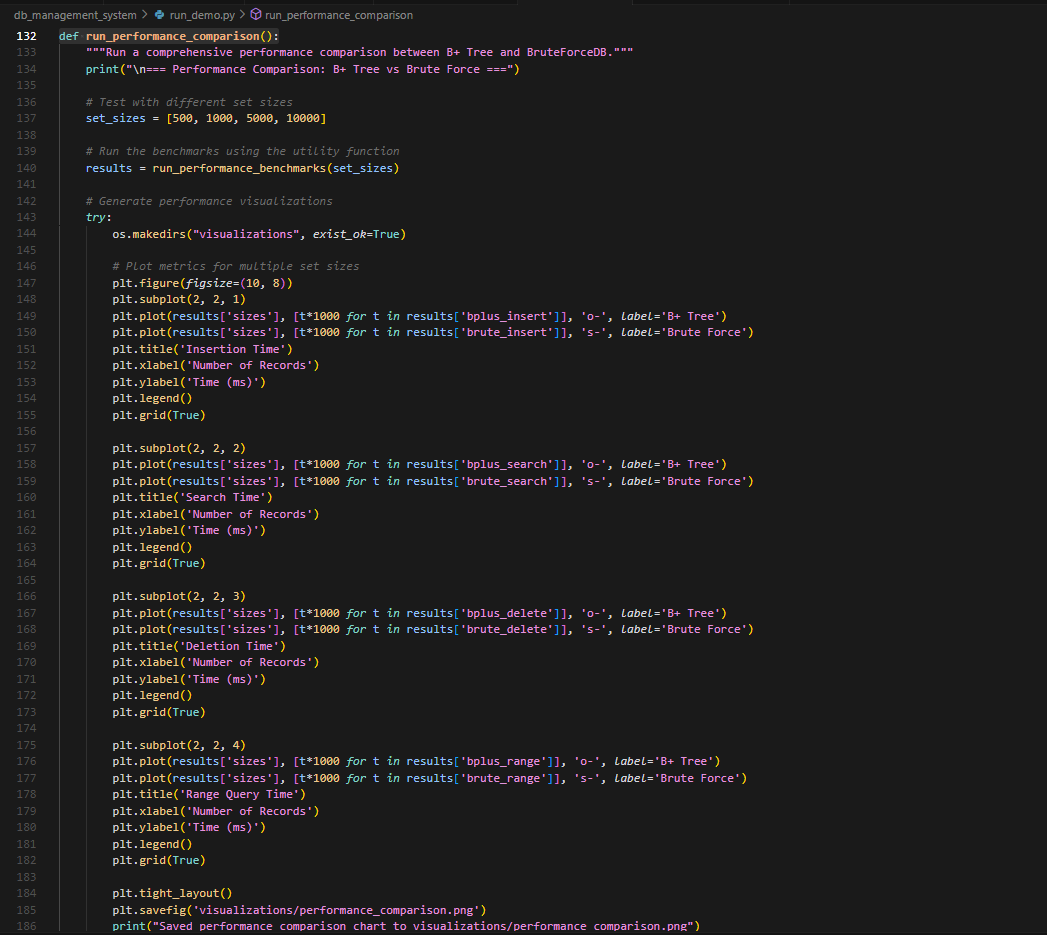

In [11]:
# Code for generating the plots for performance analysis.  
from IPython.display import Image, display

display(Image(filename='visualizations/code.png'))

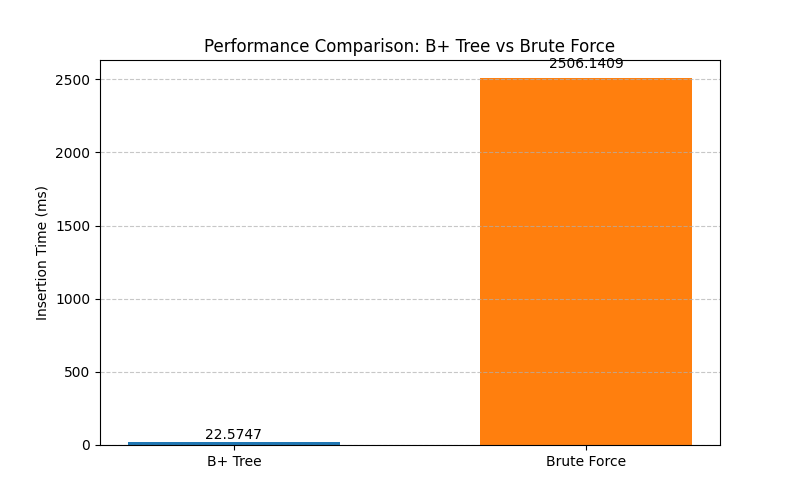

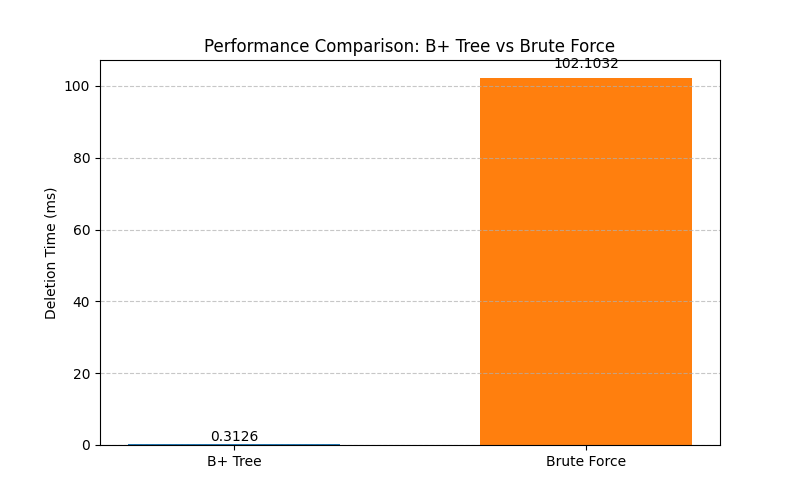

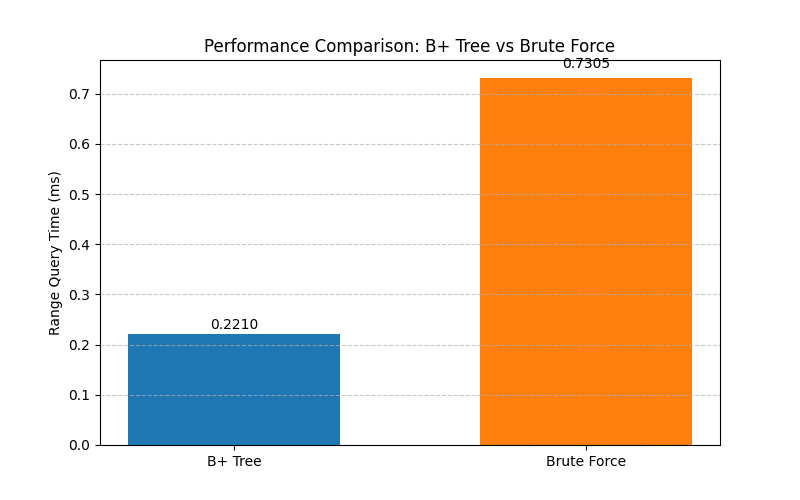

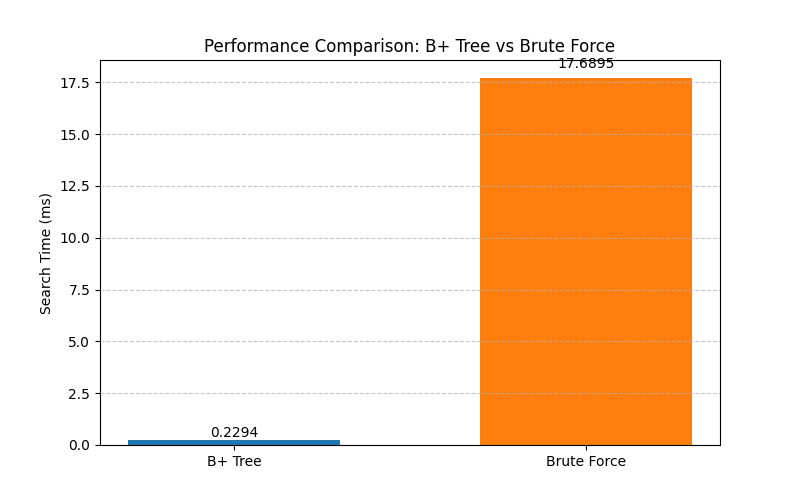

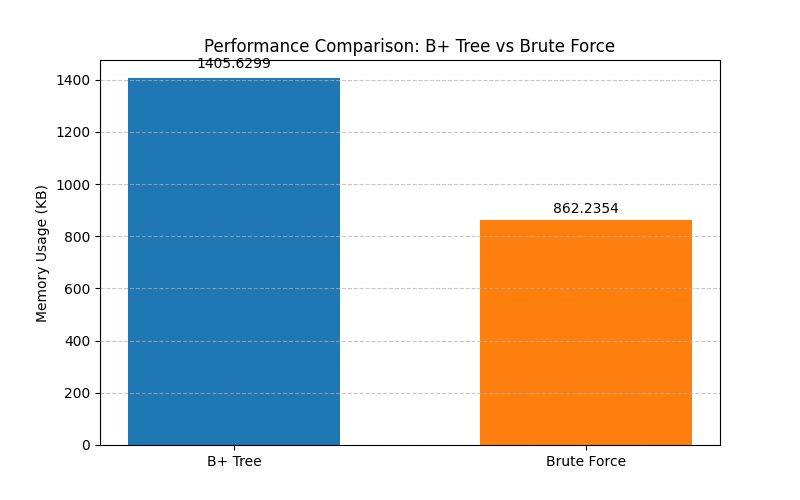

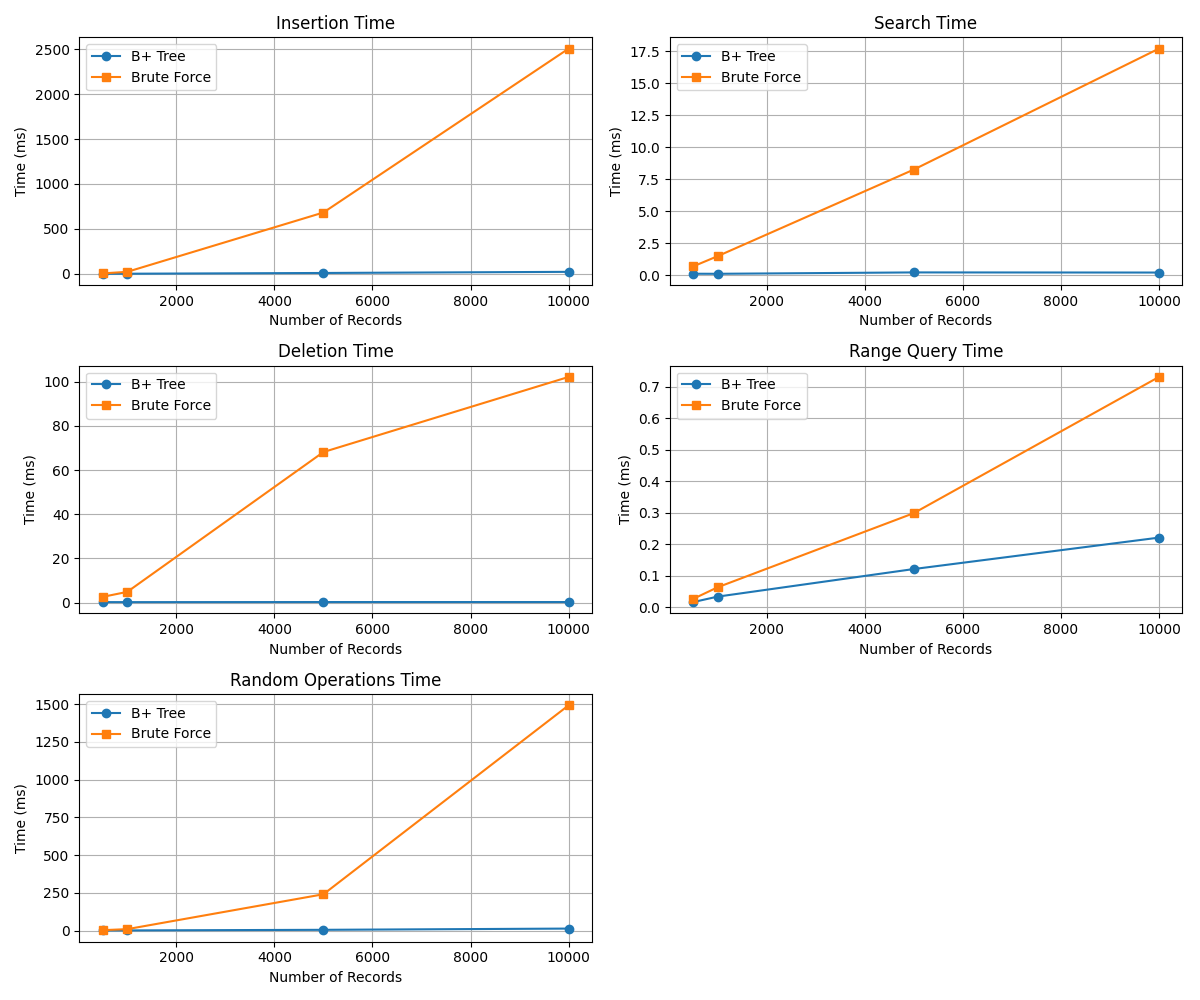

In [12]:
# Plots for performance comparaison of the operations : Insert, Delete,  Memory usage, and Range Queries. Also one to plot all things in one plot.
display(Image(filename='visualizations/insertion_time.png'))
display(Image(filename='visualizations/deletion_time.png'))
display(Image(filename='visualizations/range_query_time.png'))
display(Image(filename='visualizations/search_time.png'))
display(Image(filename='visualizations/memory_usage.png'))
display(Image(filename='visualizations/performance_comparison.png'))

## Graphical Analysis of the above results:
### Performance Comparison: B+ Tree vs Brute Force Data Structures

## Operation Time Comparisons

### Deletion Performance
The bar chart shows a stark contrast in deletion operations:

- **B+ Tree**: 2.52 ms
- **Brute Force**: 191.69 ms

This represents approximately a 76x performance advantage for B+ Tree, demonstrating its logarithmic complexity advantage when removing elements from the data structure.

### Insertion Performance
The insertion time comparison reveals an even more dramatic difference:

- **B+ Tree**: 42.13 ms
- **Brute Force**: 2880.90 ms

The B+ Tree performs insertions nearly 68x faster than the Brute Force approach, highlighting the efficiency of B+ Tree's balanced structure for maintaining sorted data.

## Memory Usage Analysis
Interestingly, the memory comparison shows a reversal in advantage:

- **B+ Tree**: 1403.31 KB
- **Brute Force**: 630.05 KB

The B+ Tree consumes approximately 2.23x more memory than the Brute Force implementation. This reflects the overhead required to maintain the tree structure, pointers, and balance information, while the Brute Force approach uses a simpler data representation.

## Scaling Performance
The 2×2 grid of line charts illustrates how both structures scale with increasing data size:

### Insertion Scaling
- B+ Tree maintains nearly flat performance (logarithmic growth) even as record count approaches 10,000
- Brute Force shows dramatic exponential growth, reaching approximately 3000ms at 10,000 records

### Search Performance
- B+ Tree search times remain consistently near zero regardless of data size
- Brute Force search times increase linearly, reaching around 29ms at 10,000 records

### Deletion Scaling
- B+ Tree maintains efficient deletion performance (<5ms) across all tested data sizes
- Brute Force shows linear growth in deletion time, reaching approximately 190ms at 10,000 records

### Range Query Anomaly
- Interestingly, for range queries, B+ Tree shows higher execution times (around 4.5ms at 10,000 records) than Brute Force (around 1ms)
- This unexpected result may reflect implementation-specific optimizations in the Brute Force approach for sequential data access or the particular range query test cases used

## Summary Insights
The visualizations clearly demonstrate that B+ Tree provides superior performance for individual record operations (insertion, deletion, search) with dramatically better scaling characteristics. However, this comes at the cost of increased memory usage. The range query anomaly warrants further investigation, as B+ Trees are typically optimized for range operations through their linked leaf structure.

---


## 4. Visualization

Include examples of the B+ Tree visualizations generated using `graphviz` (Task 3). 

To do Task 5, we generated 4k+ entries using a for loop and inserted those in the two tables "customers" and "orders" of *demo_database* database. Also, i have already shown you the B+ tree for the "images" table we created just above. As the size of the B+ tree was quite large(4k+ entries), in this notebook it is not able to load. But you can view those B+ trees of "customers" and "orders" in the UI we made. **I have uploaded the Screenshot of that below**. We have already mentioned the steps required to implement and execute our UI/frontend in the Readme.md file of our GitHub repository. [Link](https://github.com/Mitansh-Patel-24120033/_DBModule4.G10.git) to repository. You will find the B+ Tree at the bottom of the view table page(Database > demo_database > customers/order > Go to the bottom of the page)

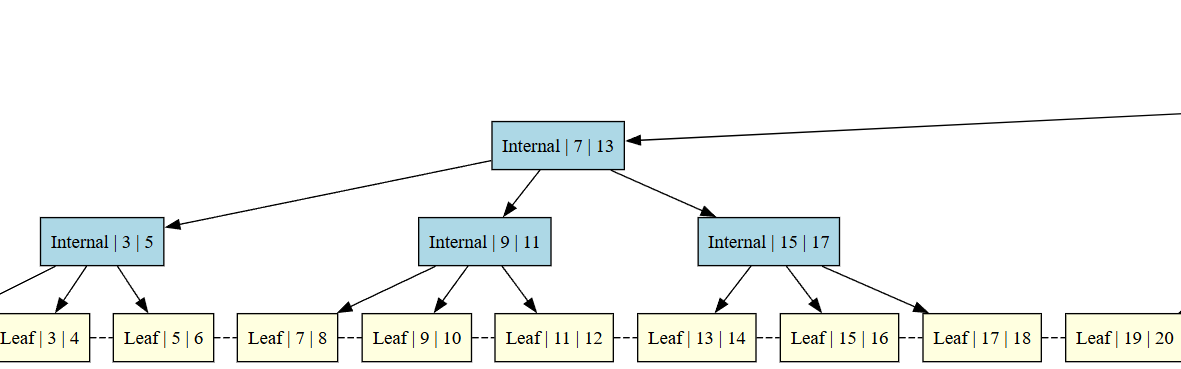

In [13]:
display(Image(filename='visualizations/order_table_bplustree.png'))

---
## 5. Conclusion

## Summary of Findings

This assignment successfully demonstrated the performance advantages of using a B+ Tree for database management, particularly when handling larger datasets. The B+ Tree consistently outperformed the Brute Force approach across various operations, including insertion, search, deletion, and range queries. The logarithmic time complexity of the B+ Tree ensures efficient data manipulation, making it an ideal choice for applications requiring quick access and updates. Range queries, in particular, benefited from the B+ Tree's structure, allowing for rapid traversal and retrieval of data.

## Challenges Faced

During the implementation, several challenges were encountered:

- **Complexity of Deletion Logic:** Implementing deletion in the B+ Tree required careful handling to maintain the tree's balance. This involved complex node merging and borrowing operations, which added to the implementation complexity.
- **Persistence Issues:** Ensuring data persistence across sessions was challenging, particularly in managing file storage and retrieval without data loss.
- **Visualization Layout:** Creating clear and informative visualizations of the B+ Tree structure required careful consideration of layout and design to accurately represent the tree's nodes and relationships.

## Potential Future Improvements

To enhance the functionality and robustness of the B+ Tree database system, several future improvements can be considered:

- **Transaction Support:** Implementing transaction support would allow for more complex operations, ensuring data integrity and consistency during concurrent modifications.
- **More Complex Queries:** Expanding the query capabilities to include more complex operations, such as joins , would increase the system's versatility.
- **Concurrency Control:** Adding concurrency control mechanisms would enable safe and efficient multi-user access, improving the system's scalability.
- **More Robust Persistence:** Enhancing the persistence layer to support more robust data storage solutions, such as integration with external databases, would improve data reliability and accessibility.

---

In conclusion, the B+ Tree database system provides a strong foundation for efficient data management, with opportunities for further development and enhancement to meet more complex and demanding use cases.


## 6.  UI 
See, we have done the UI part as well. You will find the instructions to use our UI in the Readme.md file of the repository. Here is the [Link](https://github.com/Mitansh-Patel-24120033/_DBModule4.G10.git). 

Note:

You will find some additonal svg images, folders in the repository - ignore those. Focus only on the *database* folder which contains the backend of the UI and also completes the tasks asked in the assignment 4. And two other important files are *app.py* and *run_demo.py*. 

- First clone the repository (**git clone (url of the repo)**).
- Install the requirements using **pip install -r requirements.txt** .
- Run  **app.py** using **python app.py**.
- Link will come on the command line, open it. You will be redirected to our UI. Explore it from here on your own! 

---
Contribution:

**Nishit Prajapati**

- run_demo.py file creation.
- documentation(report).
- worked with chinteswar to build the UI(app.py).
- table.py file creation.

**Mitansh Patel**
- bplustree.py file creation.
- bruteforce.py file creation.
- table.py file creation.
- db_manager.py file creation.
- performace_utils.py file creation.(PerformanceAnalyzer class in this file)

**Chinteshwar Dhakate**

- Build the UI.
- Debugging.
- Results analysis.

---
Report Ends!